In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
df=pd.read_csv("/content/iphone_purchase_records.csv")
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [206]:
df.head(6)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0


In [207]:
df.shape

(400, 4)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [209]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [210]:
df.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

In [211]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [212]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [213]:
df

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [214]:
df.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


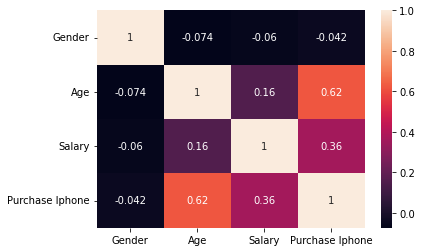

In [215]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

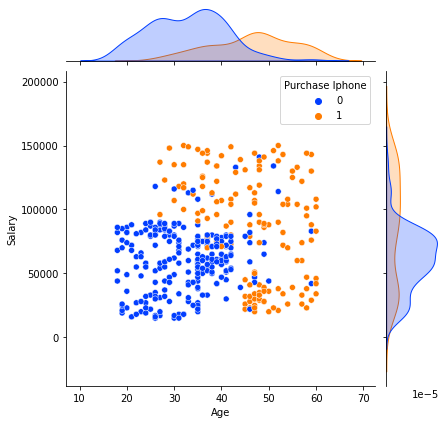

In [216]:
sns.jointplot(data=df, x="Age", y="Salary", hue="Purchase Iphone",palette = 'bright')

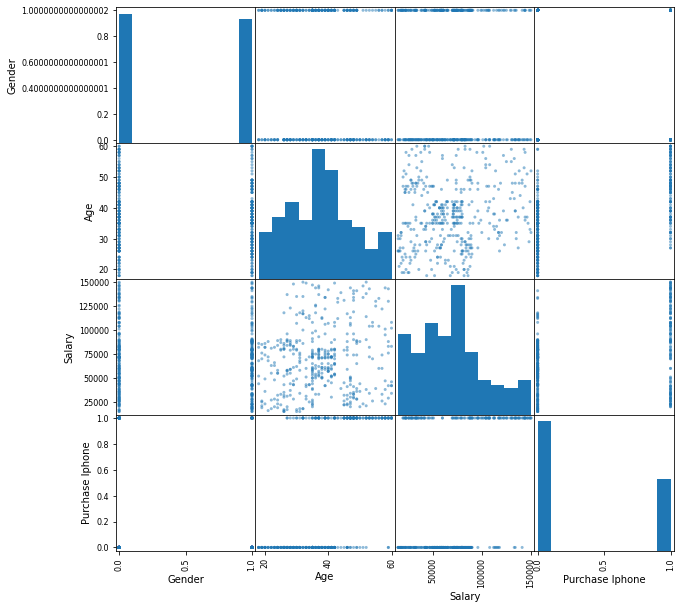

In [217]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(10, 10))
plt.show()

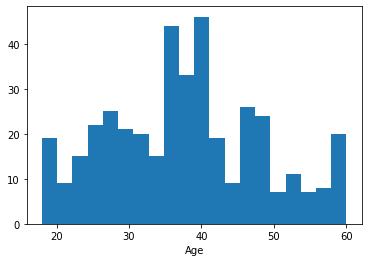

In [218]:
plt.hist(x['Age'], bins=20)
plt.xlabel('Age')
plt.show()

In [219]:
#splitting into x and y 
x = df[['Gender','Age','Salary']]
y = df['Purchase Iphone']

In [220]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [221]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [231]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


In [232]:
#Step 4-Fit the classifier 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = "entropy", max_depth=3)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [233]:
#Step 5-Predict

y_pred =classifier.predict(x_test)

In [241]:
from sklearn import metrics

y_pred = classifier.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("True positives:", TP)
print("True negatives:", TN)
print("False positives:", FP)
print("False negatives:", FN)


[[67  6]
 [ 2 45]]
True positives: 45
True negatives: 67
False positives: 6
False negatives: 2


In [242]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision score:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall score:", recall)

Accuracy score: 0.9333333333333333
Precision score: 0.8823529411764706
Recall score: 0.9574468085106383
